# Imports

In [1]:
import os
import sys
sys.path.insert(0, os.environ.get('SRC_FIGMA_PATH'))

import resources.context as c # First import because it's not object oriented
from cryptocurrencyetl import CryptocurrencyEtl
from dataanalysis import DataAnalysis
from datatransform import DataTransform
from timeseriesmodeling import TimeSeriesModeling

# 1.0. Data Extraction

In [2]:
# extract any cryptocurrency historical data to analysis
crypto = 'BTC'
market_curr = 'USD'
api_key = os.environ.get('TOKEN_FIGMA_CRYPTO_KEY')

crypt_etl = CryptocurrencyEtl(crypto=crypto, market_curr=market_curr, api_key=api_key)

#crypt_etl.test_market_curr()
#crypt_etl.test_crypto()

df_btc_usd = crypt_etl.run()

CryptoETL || 2022-07-02 12:03:36,355 (INFO) || Initing extract of ETL to obtain BTC historical data in USD value!
CryptoETL || 2022-07-02 12:03:37,560 (INFO) || Initing data transform of BTC historical data!
CryptoETL || 2022-07-02 12:03:37,574 (INFO) || ETL finished!


In [4]:
import pandas as pd
df_test = df_btc_usd.reset_index()
df_test['timestamp'] = pd.to_datetime(df_test['timestamp'])

In [11]:
df_test['timestamp'] = df_test['timestamp'].astype(str)

In [13]:
df_test.head().to_csv('/home/valcilio/all_proj/figma_assus/dash_pred_crypto/domain/use_cases/tests/test_data/test_df.csv', index=False)

In [12]:
df_test.dtypes

timestamp     object
open         float64
high         float64
low           object
close          int64
volume       float64
dtype: object

In [7]:
dict(df_test.dtypes)

{'timestamp': dtype('<M8[ns]'),
 'open': dtype('float64'),
 'high': dtype('float64'),
 'low': dtype('float64'),
 'close': dtype('float64'),
 'volume': dtype('float64')}

In [3]:
# use standard dataset to test notebook's code
#df_test = pd.read_csv(c.DATA_INT_FLD / 'test_df.csv')

# 2.0. Data Analysis

In [4]:
analy = DataAnalysis(df_btc_usd, date_col='timestamp', individual_figsize=(18, 8), start_date='2021-01-01')

## Adfuller Description

In [5]:
txt_path = c.FIG_FLD / 'crypto_analysis/adffuller_description.txt'
analy.adfuller_description(y='close', saving_txtloc=txt_path)

1. ADF : -1.5803384041718487
2. P-Value : 0.49346219727198454
3. Num Of Lags : 0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation: 544
5. Critical Values :
	1%: -3.4424279871882573
	5%: -2.8668676073304407
	10%: -2.569607433093642



## Statistical Description

In [6]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_statistical_description_test.png'
analy.statistical_description(saving_figloc=fig_path)

[0629/203234.057713:ERROR:sandbox_linux.cc(378)] InitializeSandbox() called with multiple threads in process gpu-process.
[0629/203234.181139:INFO:headless_shell.cc(653)] Written to file /tmp/tmpldz32zre/temp.png.


,attributes,mean,median,std,min,max,range,skew,kurtosis
0,open,43964.853101,43059.960000,10236.515140,18970.79000,67525.820000,48555.030000,0.079992,-0.548975
1,high,45225.677101,44101.120000,10396.128207,20388.79000,69000.000000,48611.210000,0.057089,-0.539885
2,low,42484.376220,41938.510000,10084.299703,17622.00000,66222.400000,48600.400000,0.080746,-0.555212
3,close,43949.280330,43059.960000,10266.466602,18970.79000,67525.830000,48555.040000,0.067183,-0.533645
4,volume,65786.835229,55266.108781,38820.617540,2188.92853,354347.243161,352158.314631,2.368826,9.174577


## Seasonal Decomposition

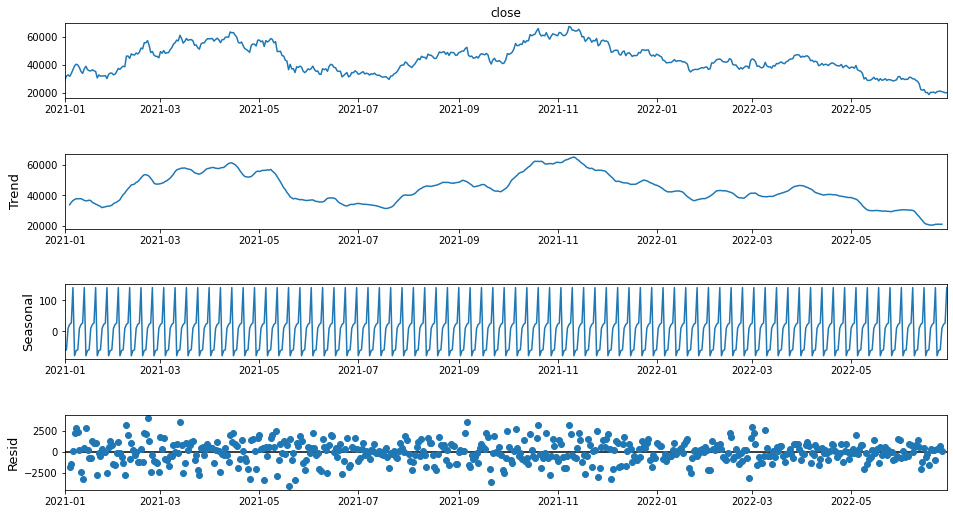

In [7]:
fig_path = c.FIG_FLD / 'crypto_analysis/seasonal_decomposer.jpg'
analy.plot_seasonal_decomposer(y='close', saving_figloc=fig_path, all_inches=(15, 8))

## Temporal Estability

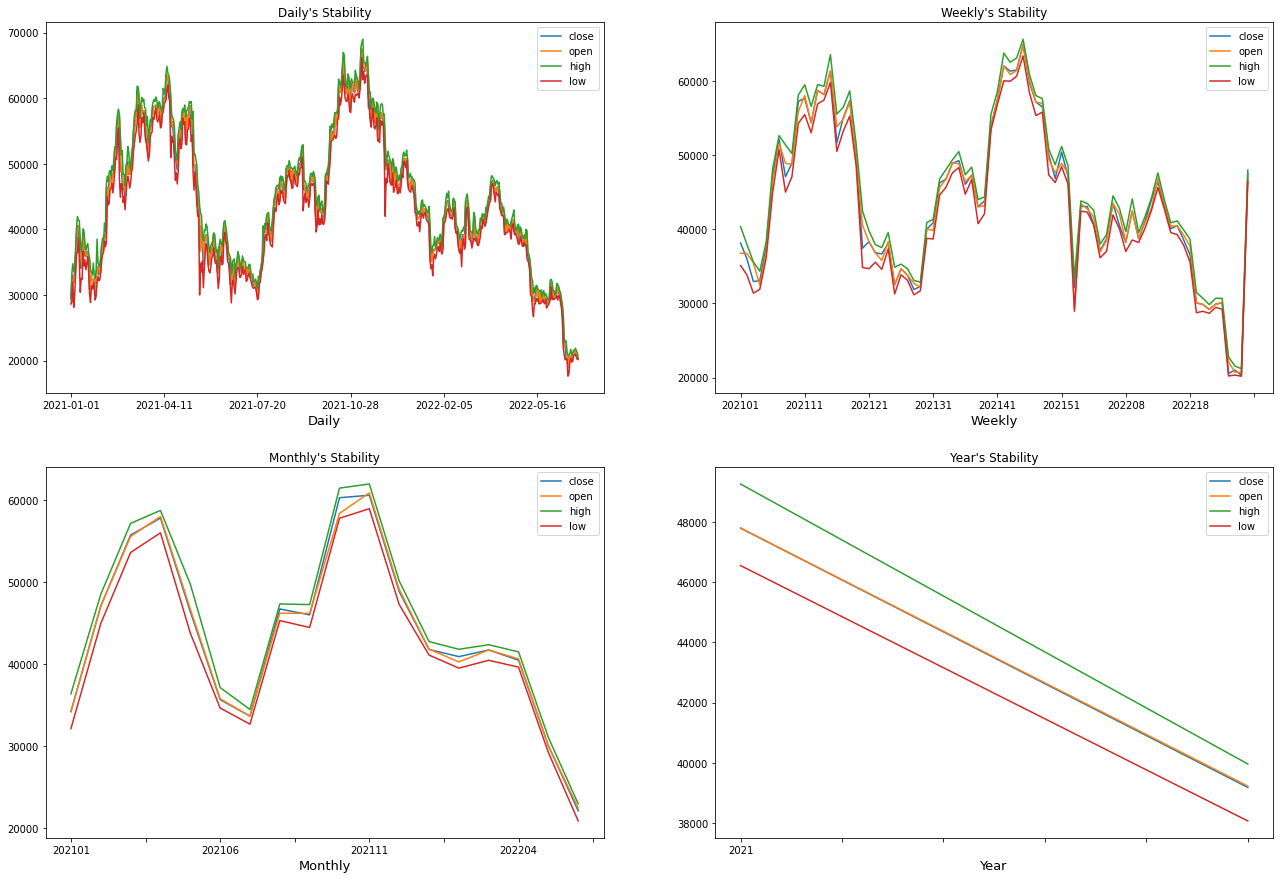

In [8]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_stability_all.jpg'
analy.all_timely_stability(y=['close', 'open', 'high', 'low'], saving_figloc=fig_path)

## Outlier Identification

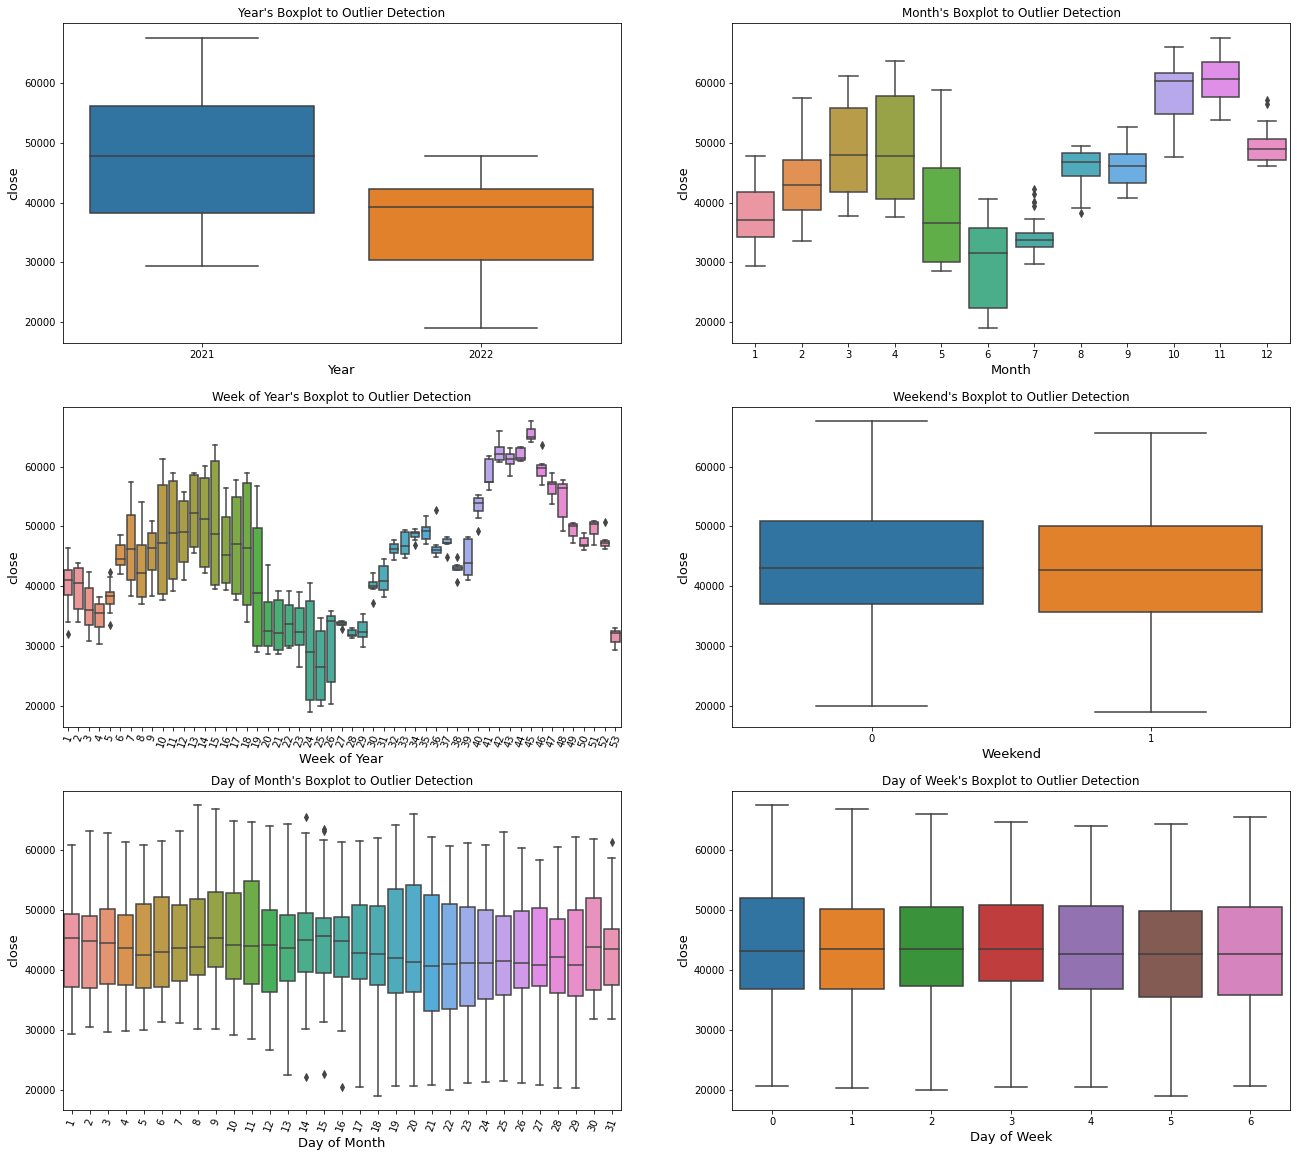

In [9]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_outlier_detector_all.jpg'
analy.all_temporal_outlier_detector_boxplots(y='close', saving_figloc=fig_path)

## Distribution

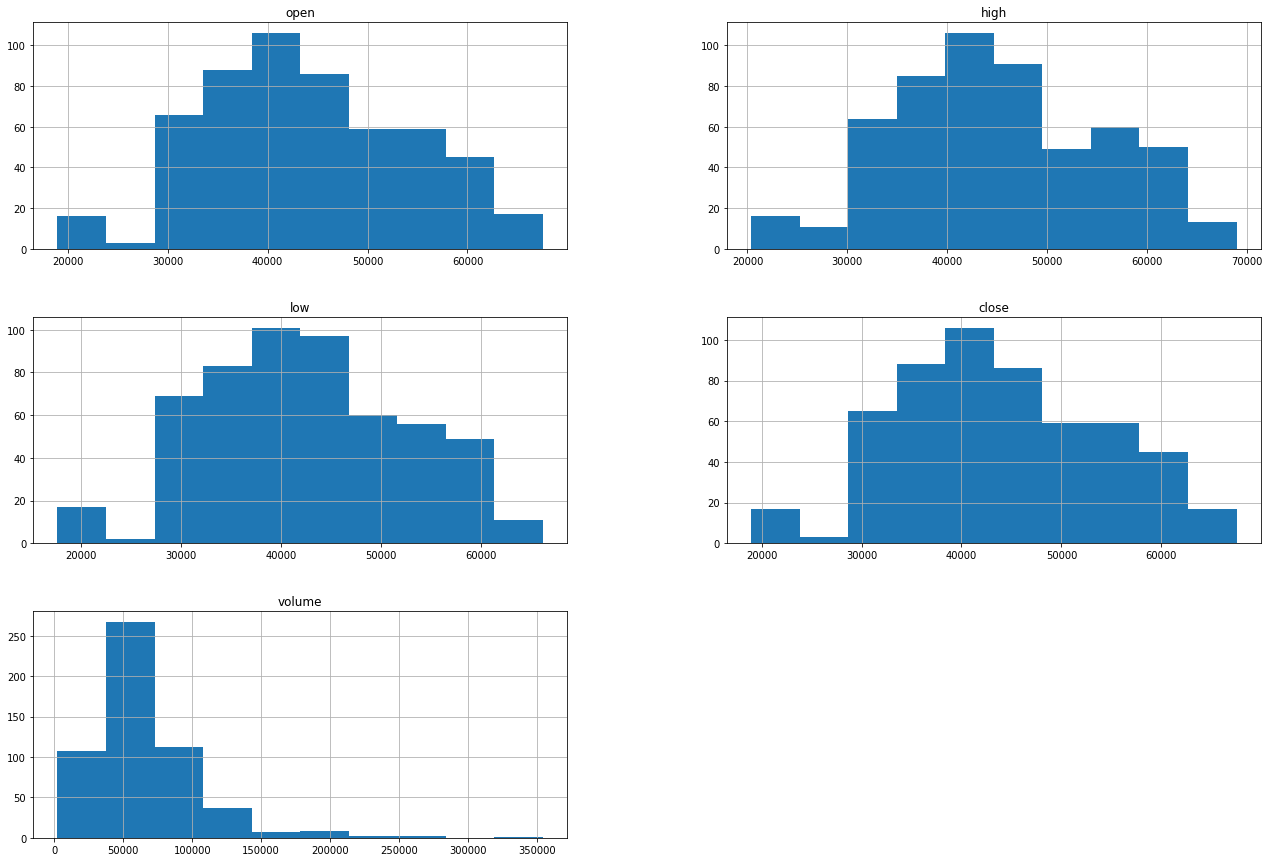

In [10]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_distribution_check.jpg'
analy.distribution_check(saving_figloc=fig_path)

## Nature Transformation Effect

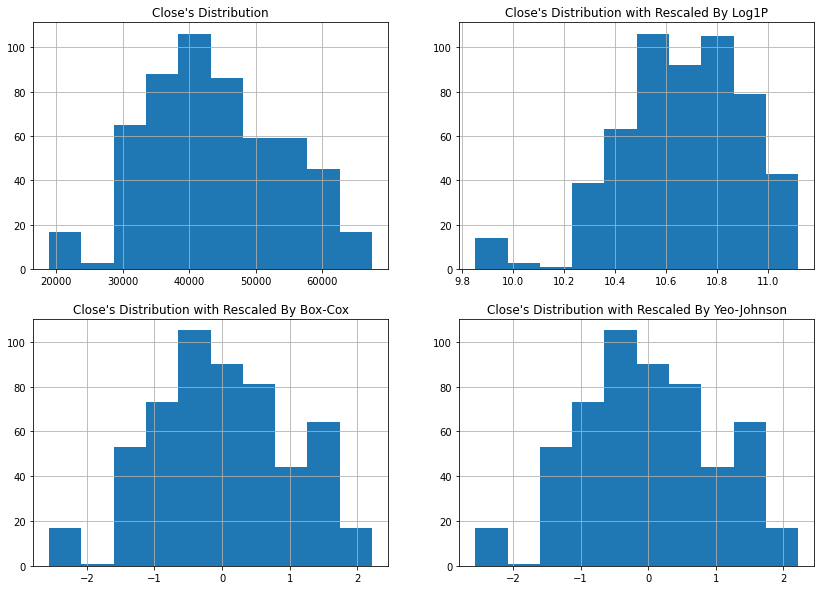

In [11]:
fig_path = c.FIG_FLD / 'crypto_analysis/btc_nature_transformation_check.jpg'
analy.rescalling_effect_check(y='close', all_figsize=(14, 10), saving_figloc=fig_path)

# 3.0. Data Preparation

In [12]:
transforming_df = DataTransform(df=df_btc_usd, date_col='timestamp', start_date='2022-01-01')
df_prep, scaler = transforming_df.prepare_dataframe_timeseries(y='close', method='log1p')

DataTrans || 2022-06-29 20:32:39,635 (WARNING) || The mean difference in log1p transformation 
                                         is below 0.01! (difference = 1.39455854271849e-12)


# 4.0. Machine Learning Model

## 4.1. Model Fit

In [13]:
ts_model = TimeSeriesModeling(df=df_prep)
model = ts_model.fit_sarimax()

## 4.2. Data Translation

### Summary

In [14]:
ts_model.model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          log1p_close   No. Observations:                  180
Model:             SARIMAX(2, 1, 5)x(1, 1, [1], 24)   Log Likelihood                 269.196
Date:                              Wed, 29 Jun 2022   AIC                           -518.391
Time:                                      20:32:51   BIC                           -487.957
Sample:                                  01-01-2022   HQIC                          -506.030
                                       - 06-29-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5338      1.757     -0.304      0.761      -3.977       2.910
ar.L2         -0.1555      1.273     -0.122      0.903      -2.651       2.340
ma.L1          0.4881      1.739      0.281      0.779      -2.921       3.897
ma.L2          0.1803      1.209      0.149      0.881      -2.189       2.550
ma.L3          0.0217      0.103      0.211      0.833      -0.180       0.223
ma.L4          0.0845      0.123      0.688      0.492      -0.156       0.325
ma.L5         -0.0450      0.185     -0.244      0.807      -0.407       0.317
ar.S.L24      -0.1272      0.179     -0.710      0.478      -0.479       0.224
ma.S.L24      -0.5411      0.158     -3.434      0.001      -0.850      -0.232
sigma2         0.0017      0.000      8.867      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                14.55
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                            -0.52
Prob(H) (two-sided):                  0.17   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Rolling Cross Validation

In [15]:
# the number of validations to be in maximum P+Q, the recommendation is to be the biggest between these two!
roll_cross_val = ts_model.rolling_cross_validation(validations = 5, model=model, scaler=scaler, orig_name='close')
roll_cross_val

,Model Name,MAE CV,MAPE CV,RMSE CV
0,SARIMAX,3743,0.09296,4318.098873


### Returning to real scaler

In [16]:
df_result = ts_model.forecast()
reverse_df = DataTransform(df=df_result, start_date='2022-01-01')
cols = list(df_result.columns)
for col in cols:
    df_result[col] = reverse_df.inverse_transformation(df=df_result, y_nt=col, col_orig_name='close', scaler=scaler)[col + '_reversed']

### Time Stability

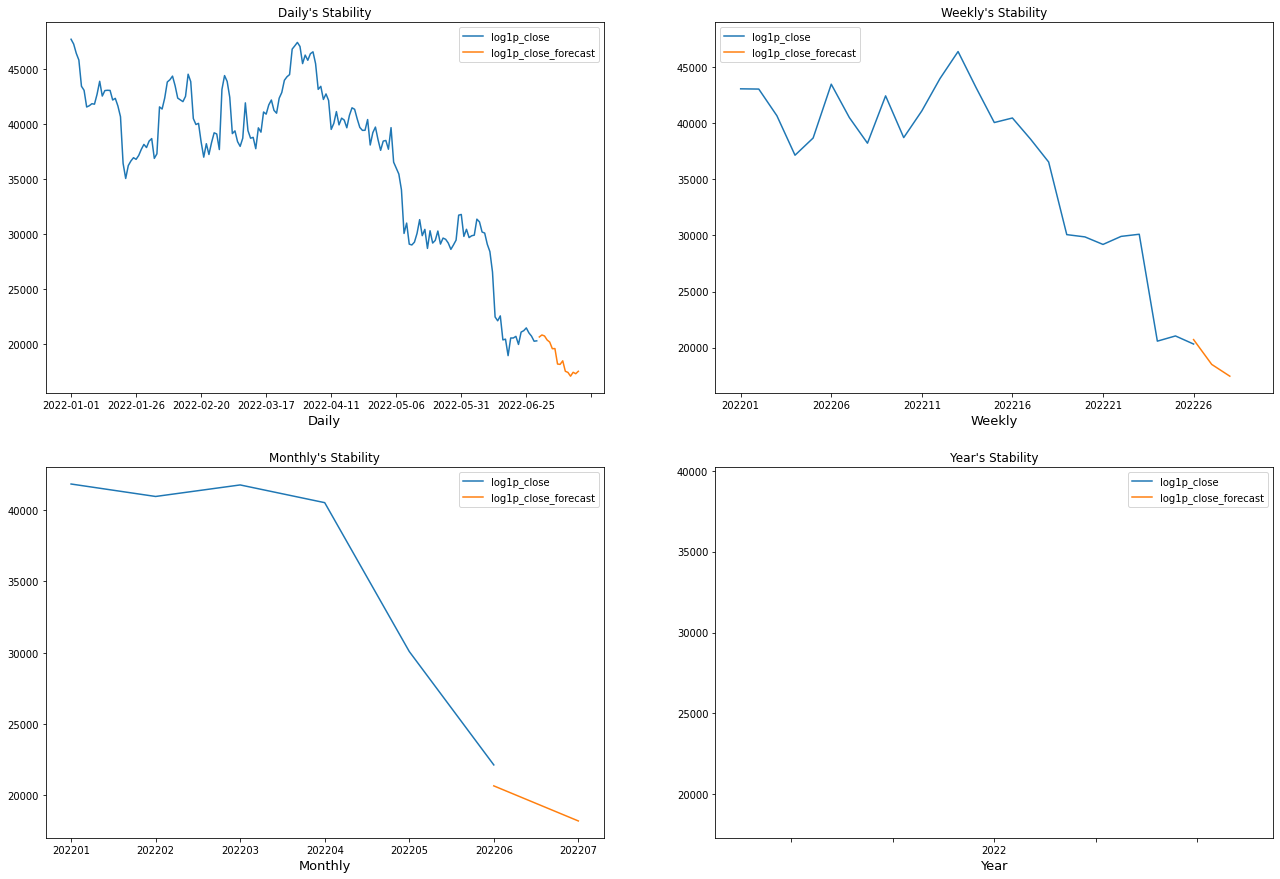

In [17]:
analy = DataAnalysis(df_result, individual_figsize=(18, 10), start_date='2022-01-01')
fig_path = c.FIG_FLD / 'crypto_analysis/model_forecast.jpg'
analy.all_timely_stability(y=list(df_result.columns), saving_figloc=fig_path)